## Preliminary Results

In [13]:
library(tidyverse)
library(readxl)

### Load Data

In [27]:
raw <- read_xlsx("adult.xlsx")

head(raw)

age,work_class,id,education,marital_status,occupation,relationship,ethnicity,sex,capital-gain,capital-loss,hours_per_week,country,income_group
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
56,Private,169133,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,<=50K
25,Private,191230,Some-college,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,Yugoslavia,<=50K
20,Private,175069,Some-college,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,<=50K
35,Private,164526,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,>50K
40,Local-gov,183096,9th,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K
31,Private,182177,Bachelors,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,<=50K


### Clean and Wrangle Data

In [102]:
data_relevent <- raw %>%
    select(work_class, education, marital_status, hours_per_week)

head(data_relevent)

work_class,education,marital_status,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Private,HS-grad,Married-civ-spouse,50
Private,Some-college,Never-married,40
Private,Some-college,Never-married,40
Private,HS-grad,Married-civ-spouse,40
Local-gov,9th,Married-civ-spouse,40
Private,Bachelors,Married-civ-spouse,40


This dataset differentes between the highest highschool, middleschool and elementary grade a person has completed if they did not complete highschool. We will be grouping those observations into one education category of "Less-than-HS"

In [118]:
data %>%
    group_by(education) %>%
    summarise(n = n())

education,n
<labelled>,<int>
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [121]:
data$education[data$education == "10th" |
          data$education == "11th" |
          data$education == "12th" |
          data$education == "1st-4th" |
          data$education == "5th-6th" |
          data$education == "7th-8th" |
          data$education == "9th"] = "Less-than-HS"

The cell below shows that we have renamed the observations that did not graduate highschool

In [122]:
data %>%
    group_by(education) %>%
    summarise(n = n())

education,n
<labelled>,<int>
Assoc-acdm,1067
Assoc-voc,1382
Bachelors,5355
Doctorate,413
HS-grad,10501
Less-than-HS,4202
Masters,1723
Preschool,51
Prof-school,576


### Broad Overview of Data

In [164]:
plot_config <- theme_classic() +
                theme(plot.title = element_text(hjust = 0.5),
                      axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
                      legend.position="none",
                      panel.spacing = unit(0.1, "lines"),
                      strip.text.x = element_text(size = 8))

hrs_per_week_all <- data %>% ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 15) +
    xlab("Hours Per Week") +
    ylab("Count") +
    ggtitle("Hours per Week Worked of Everyone in Dataset") +
    plot_config

hrs_per_week_workclass <- data %>%
    ggplot(aes(x = hours_per_week, color = work_class, fill = work_class)) +
    geom_histogram(binwidth = 5) +
    xlab("Hours Per Week") +
    ylab("Count") +
    ggtitle("Hours per Week Worked Based on Workclass") +
    plot_config +
    facet_wrap(~work_class)

hrs_per_week_education <- data %>%
    ggplot(aes(x = hours_per_week, color = education, fill = education)) +
    geom_histogram(binwidth = 5) +
    xlab("Hours Per Week") +
    ylab("Count") +
    ggtitle("Hours per Week Worked Based on Education") +
    plot_config +
    facet_wrap(~education)

hrs_per_week_marital_status <- data %>%
    ggplot(aes(x = hours_per_week, color = marital_status, fill = marital_status)) +
    geom_histogram(binwidth = 5) +
    xlab("Hours Per Week") +
    ylab("Count") +
    ggtitle("Hours per Week Worked Based on Marital Status") +
    plot_config +
    facet_wrap(~marital_status)

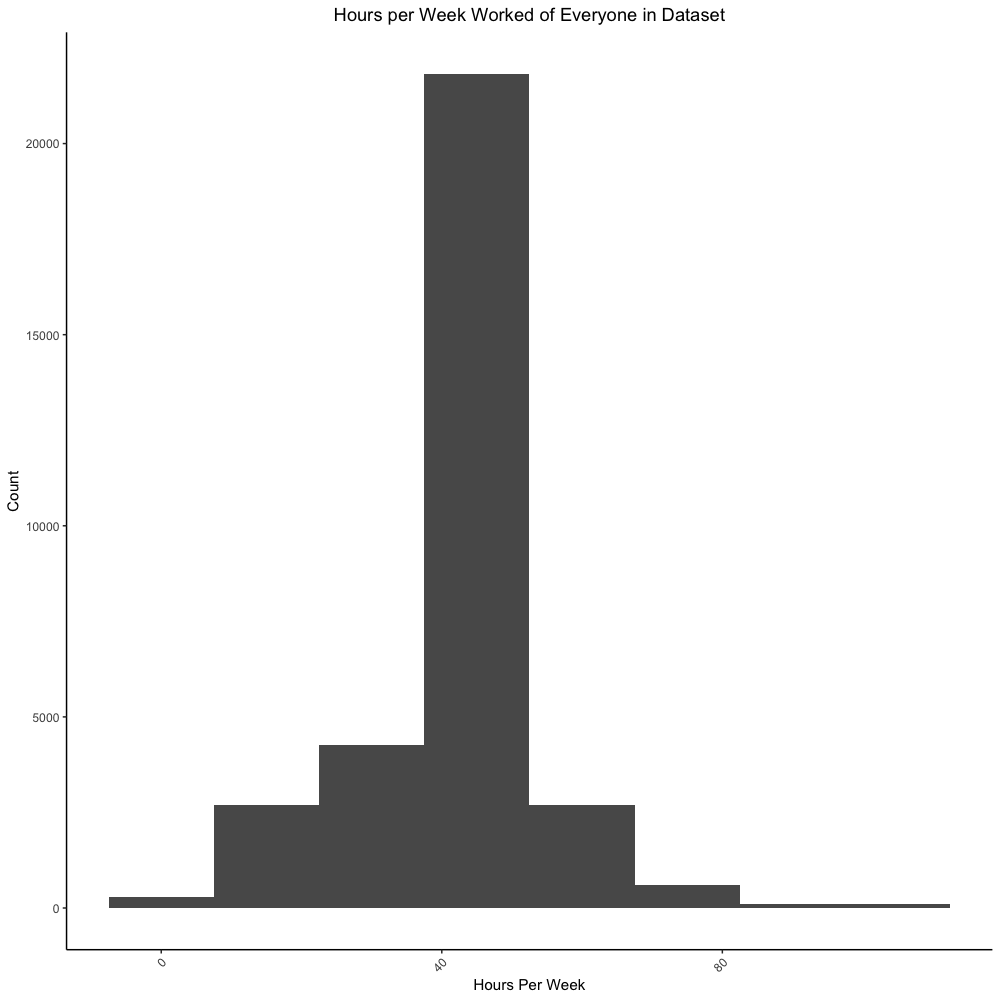

In [165]:
hrs_per_week_all

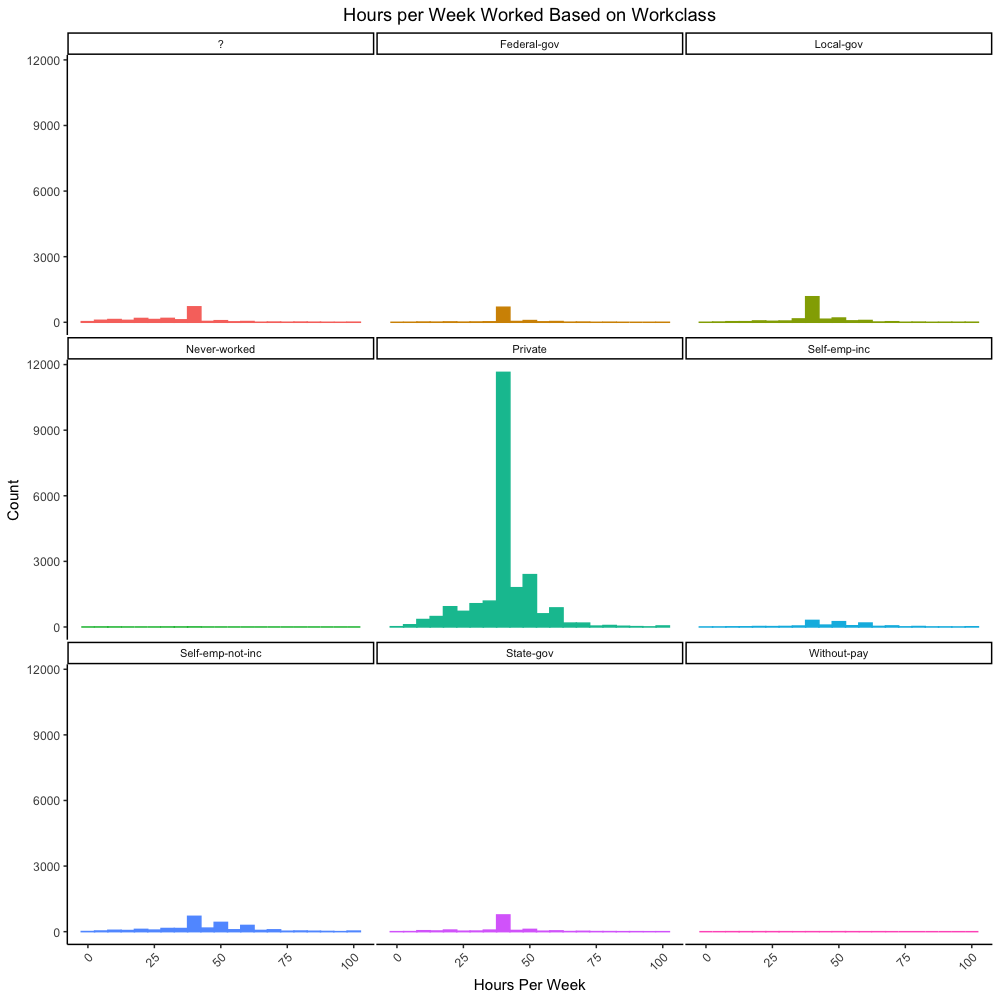

In [166]:
hrs_per_week_workclass

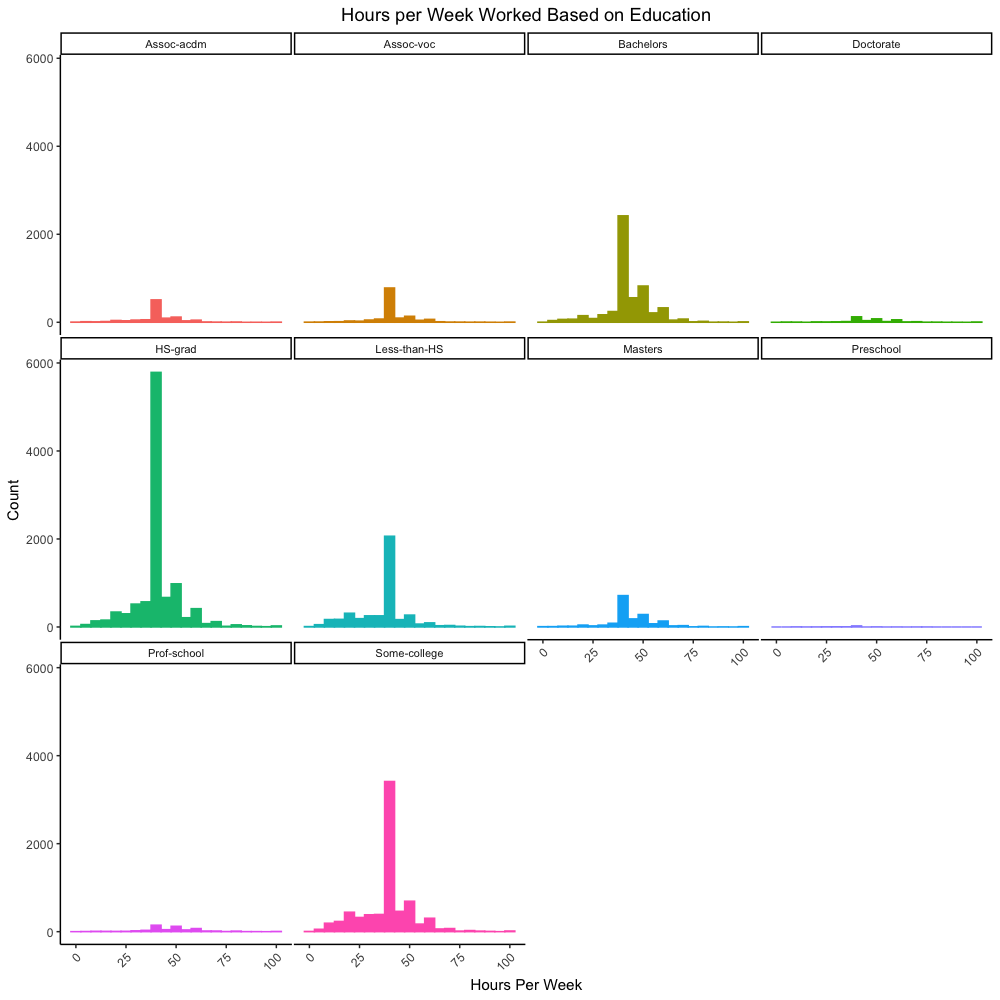

In [167]:
hrs_per_week_education

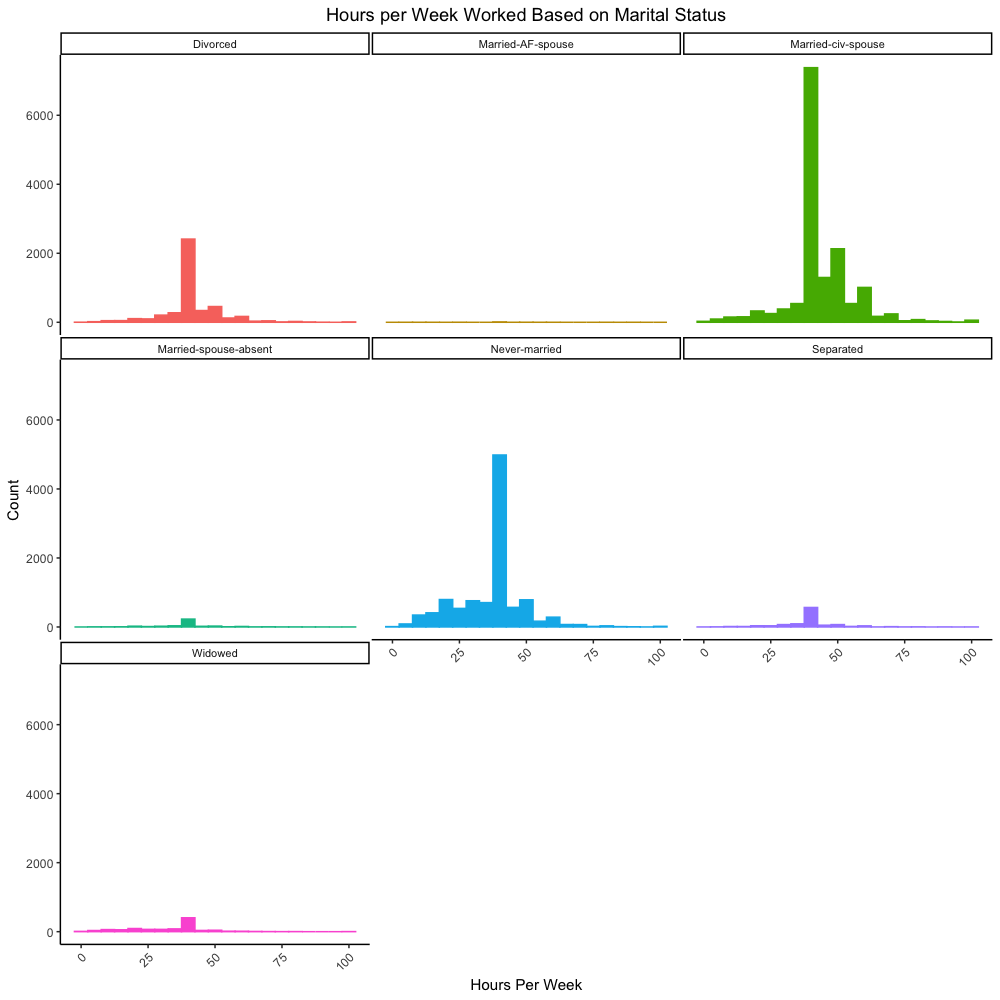

In [168]:
hrs_per_week_marital_status

### Statistics of Our Dataset

In [169]:
hrs_work_class <- data %>%
    group_by(work_class) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_education <- data %>%
    group_by(education) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_marital_status <- data %>%
    group_by(marital_status) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

In [170]:
head(hrs_work_class)

work_class,mean_hours_per_week,sd_hours_per_week
<labelled>,<dbl>,<dbl>
?,31.91939,14.909903
Federal-gov,41.37917,8.838605
Local-gov,40.98280,10.771559
Never-worked,28.42857,15.186147
Private,40.26710,11.256298
Self-emp-inc,48.81810,13.900417


In [130]:
head(hrs_education)

education,mean_hours_per_week,sd_hours_per_week
<labelled>,<dbl>,<dbl>
Assoc-acdm,40.50422,12.19667
Assoc-voc,41.61071,10.79338
Bachelors,42.61401,11.44619
Doctorate,46.97337,15.08445
HS-grad,40.57537,11.33376
Less-than-HS,36.71871,13.35716


In [131]:
head(hrs_marital_status)

marital_status,mean_hours_per_week,sd_hours_per_week
<labelled>,<dbl>,<dbl>
Divorced,41.24668,10.67663
Married-AF-spouse,41.13043,19.44060
Married-civ-spouse,43.28486,11.90505
Married-spouse-absent,39.66986,11.76737
Never-married,36.94000,12.43254
Separated,39.30146,10.37753


In [172]:
bar_means_hrs_work_class <- hrs_work_class %>%
    ggplot(aes(x = work_class, y = mean_hours_per_week, fill = work_class)) +
    geom_bar(stat = "identity") +
    xlab("Work Class") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Work Class") +
    plot_config

bar_means_hrs_education <- hrs_education %>%
    ggplot(aes(x = education, y = mean_hours_per_week, fill = education)) +
    geom_bar(stat = "identity") +
    xlab("Education Level") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Education Level") +
    plot_config

bar_means_marital_status <- hrs_marital_status %>%
    ggplot(aes(x = marital_status, y = mean_hours_per_week, fill = marital_status)) +
    geom_bar(stat = "identity") +
    xlab("Marital Status") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked Based on Marital Status") +
    plot_config

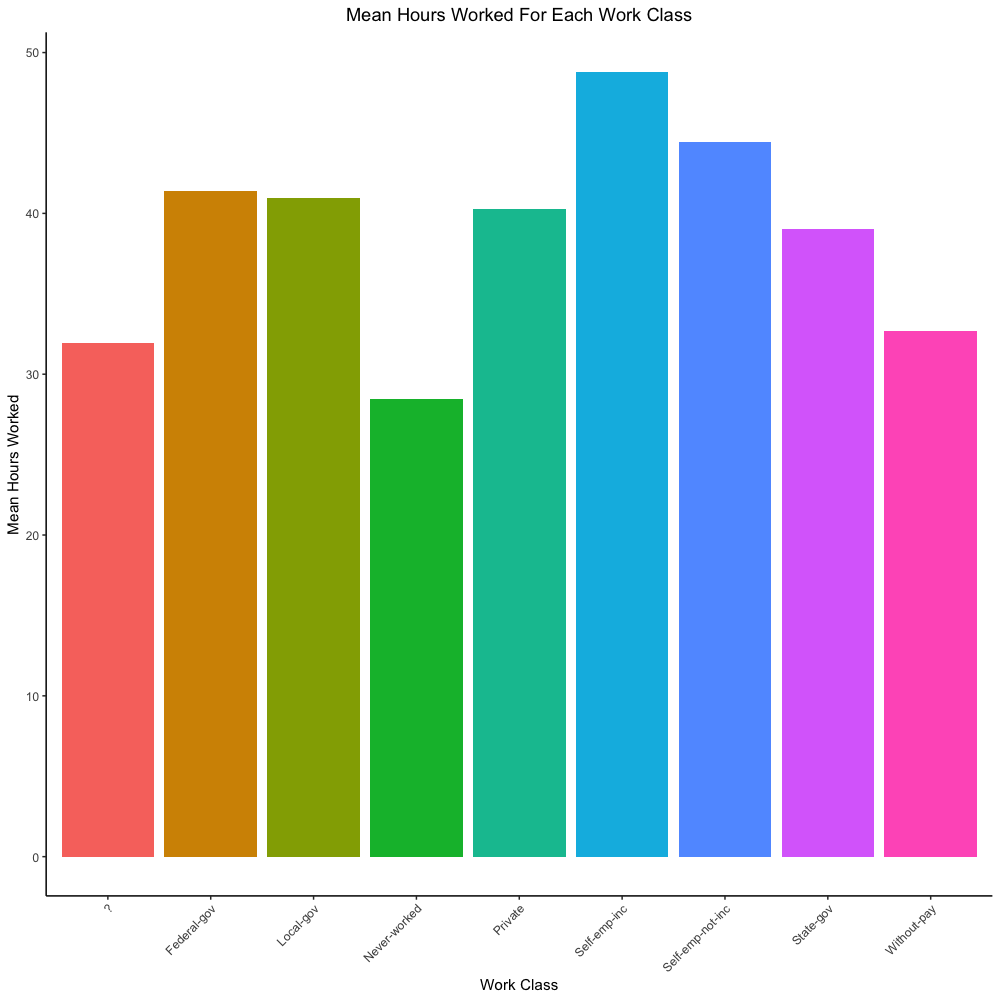

In [173]:
bar_means_hrs_work_class

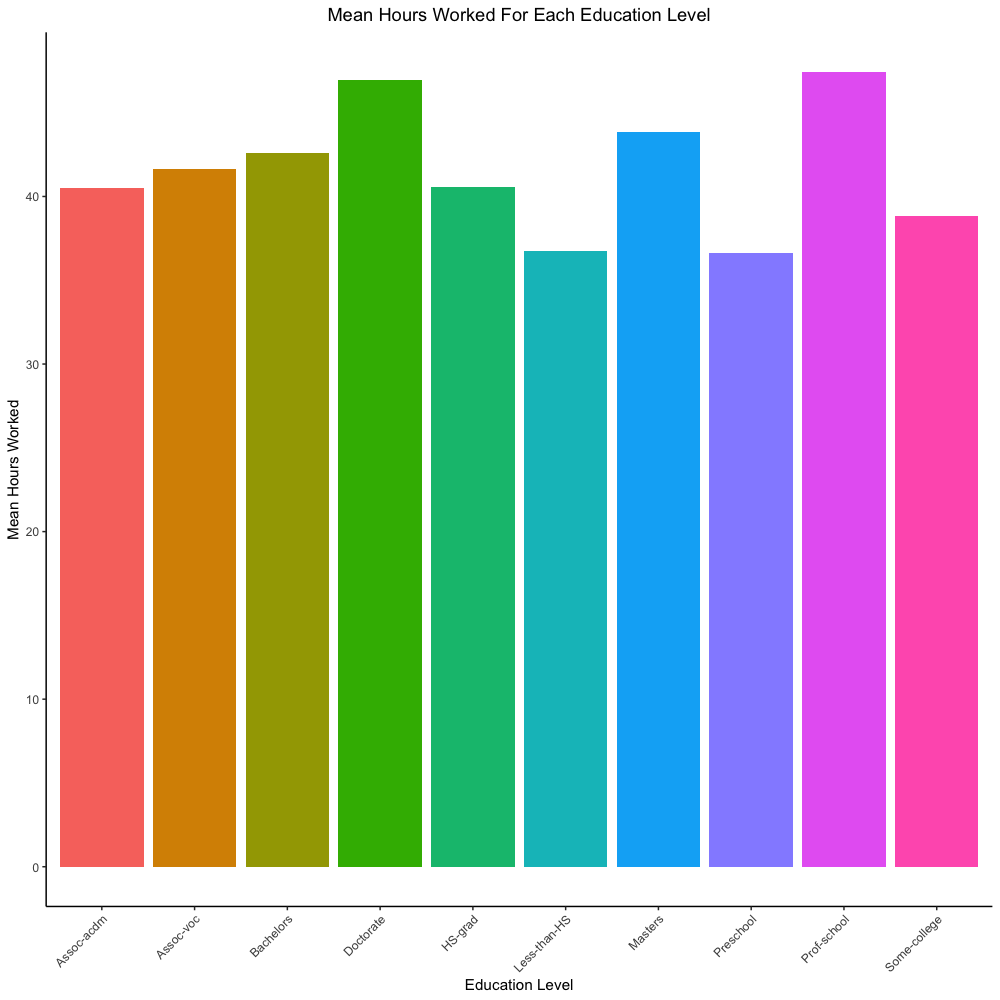

In [174]:
bar_means_hrs_education

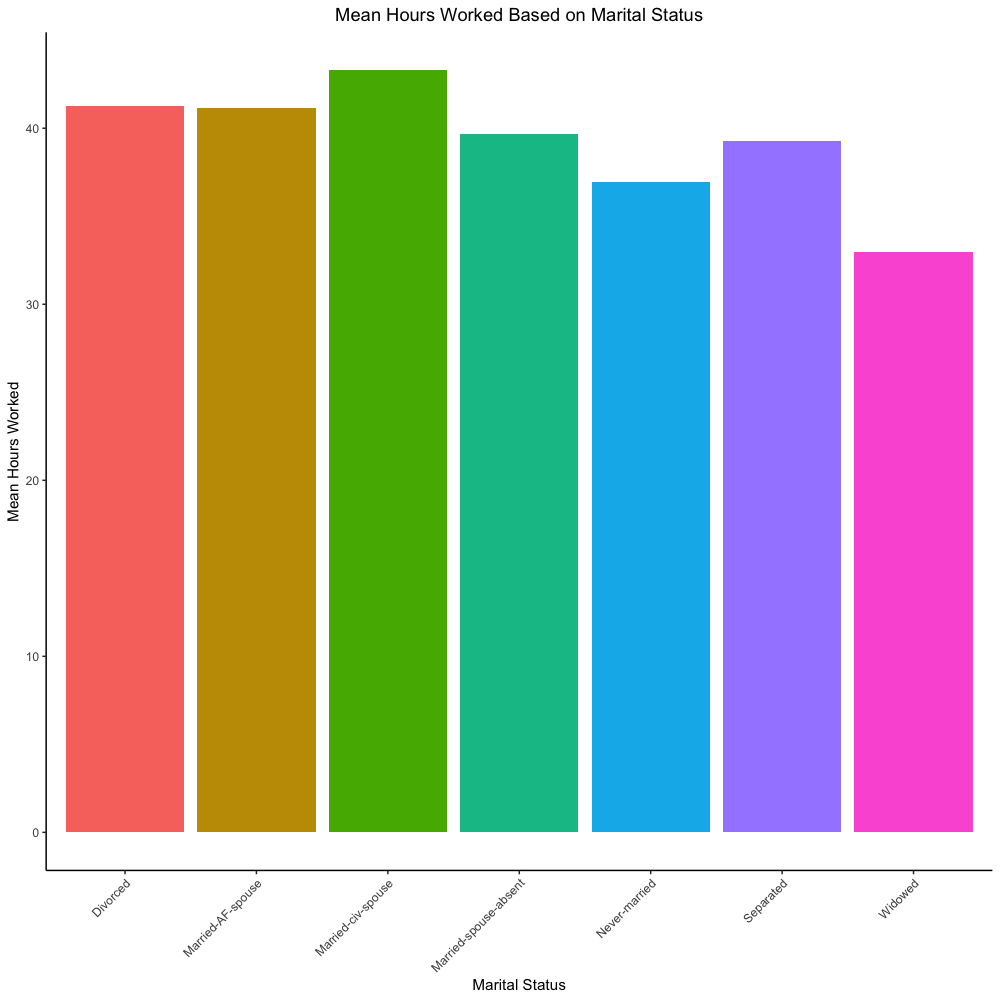

In [175]:
bar_means_marital_status

In [180]:
plot_config <- theme_classic() +
                theme(plot.title = element_text(hjust = 0.5),
                      axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
                      legend.position="none",
                      panel.spacing = unit(0.1, "lines"),
                      strip.text.x = element_text(size = 8))

box_hrs_work_class <- data %>%
    ggplot(aes(x = work_class, y = hours_per_week, fill = work_class)) +
    geom_boxplot() +
    xlab("Work Class") +
    ylab("Hours Worked") +
    ggtitle("Hours Worked For Each Work Class") +
    plot_config

box_hrs_education <- data %>%
    ggplot(aes(x = education, y = hours_per_week, fill = education)) +
    geom_boxplot() +
    xlab("Education") +
    ylab("Hours Worked") +
    ggtitle("Hours Worked Based on Education") +
    plot_config

box_hrs_marital_status <- data %>%
    ggplot(aes(x = marital_status, y = hours_per_week, fill = marital_status)) +
    geom_boxplot() +
    xlab("Marital Status") +
    ylab("Hours Worked") +
    ggtitle("Hours Worked Based on Marital Status") +
    plot_config

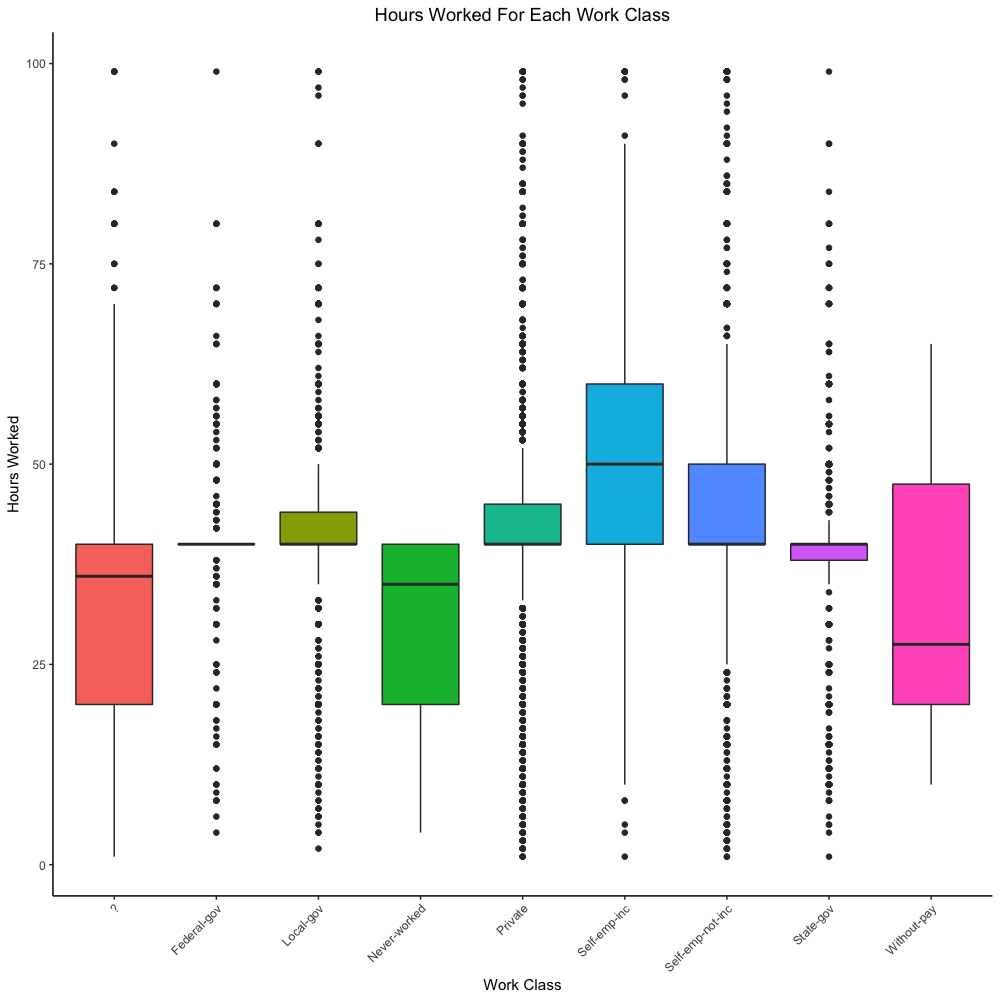

In [177]:
box_hrs_work_class

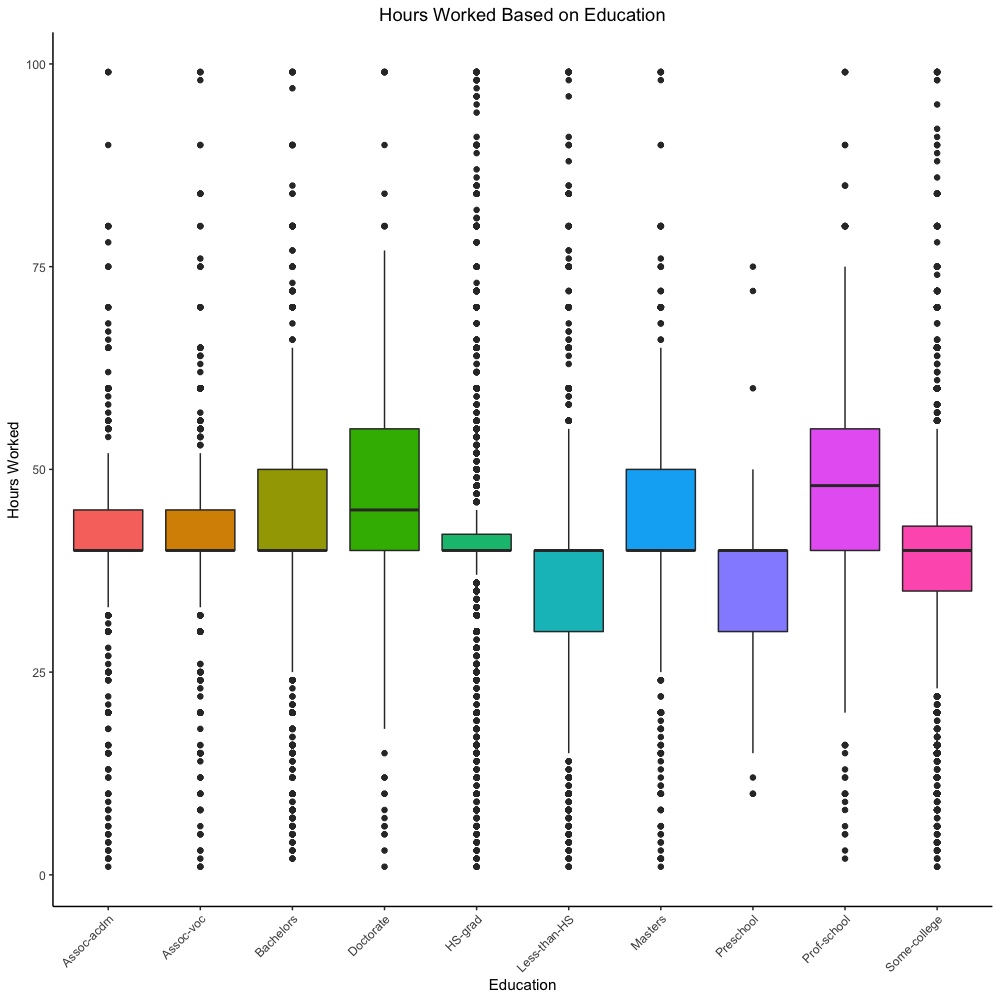

In [178]:
box_hrs_education

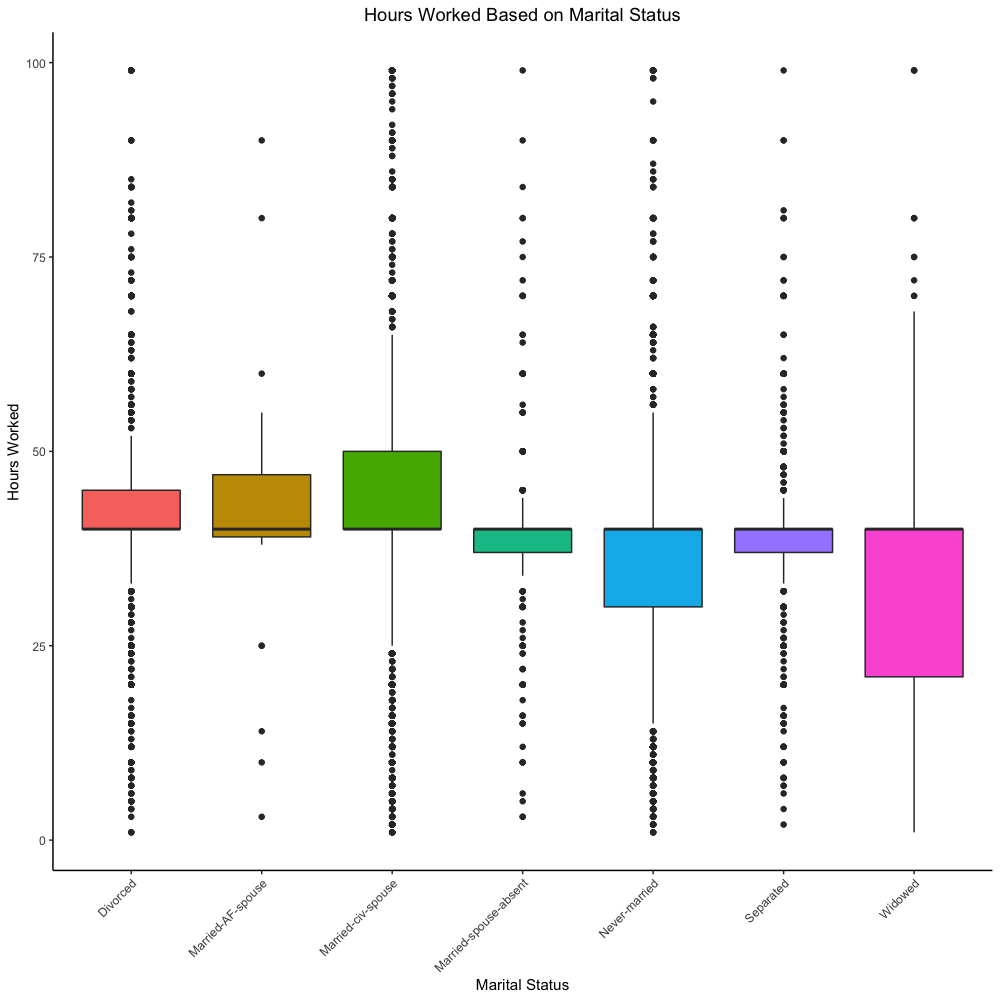

In [179]:
box_hrs_marital_status